
### Project: Crop selection using Machine Learning based on Soil and Environmental Analysis
### Author: Kamalini Pradhan


### Outline of the Project
```
1. Data Collection
2. Exploratory Data Analysis
3. Data Cleaning
4. Data Pre-processing
5. Machine Learning Models
6. Measurement of Performance Metrices
```

### 1. Data Collection

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

dataframe = pd.read_csv('crop_recommendation.csv')


### 2. Exploratory Data Analysis

#### (a) Basic Exploration (Examine the structure and summary statistics of the dataset.)

In [11]:
print("Data set structure")
dataframe.info()

print("Statistical summary")
print(dataframe.describe())

print("Check for missing values")
dataframe.isnull().sum()

Data set structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Statistical summary
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
2

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### (b) Visual Exploration (Use visualization tools to identify patterns, distributions, and relationships.)

##### Histograms and Boxplots (for numerical features)

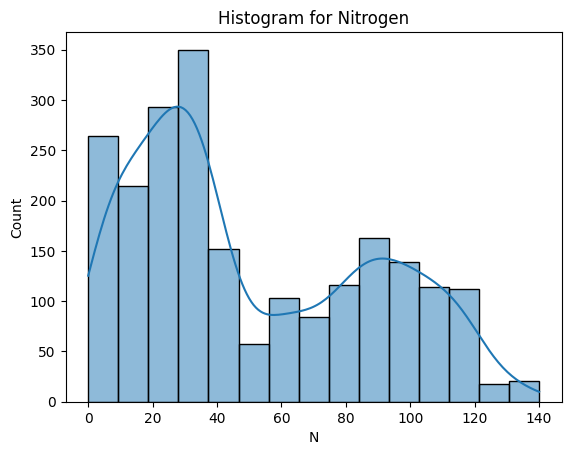

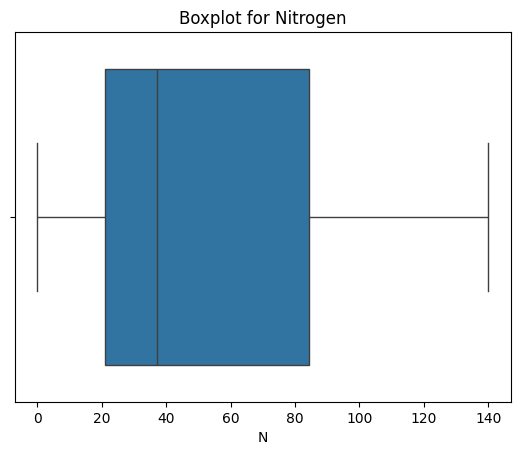

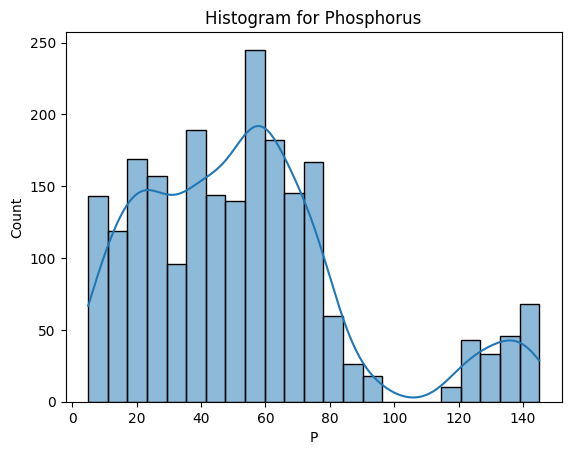

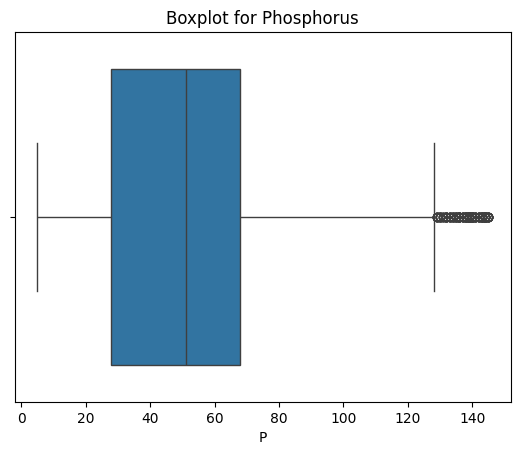

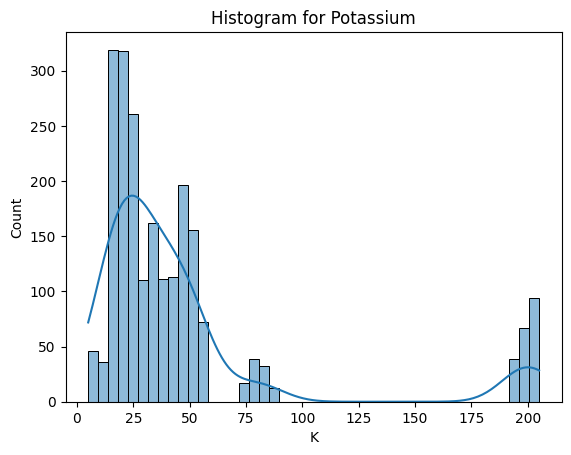

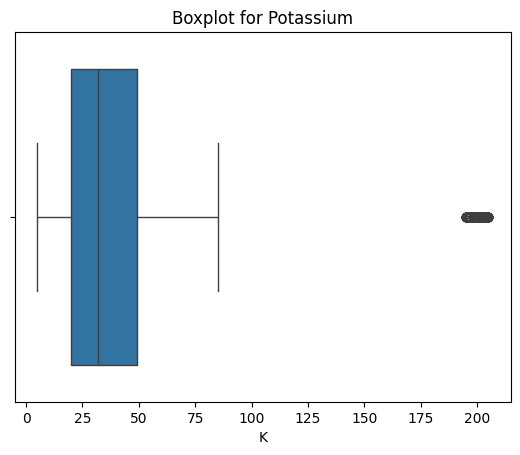

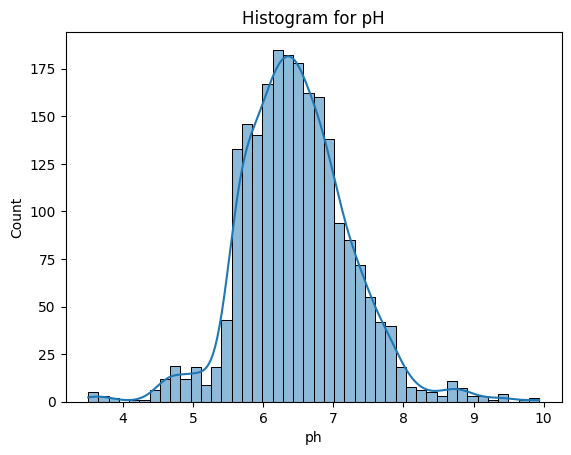

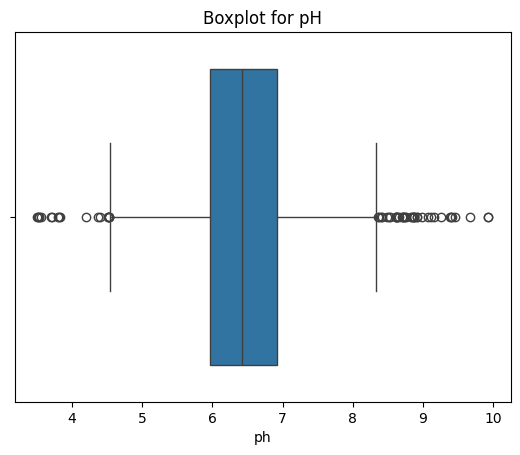

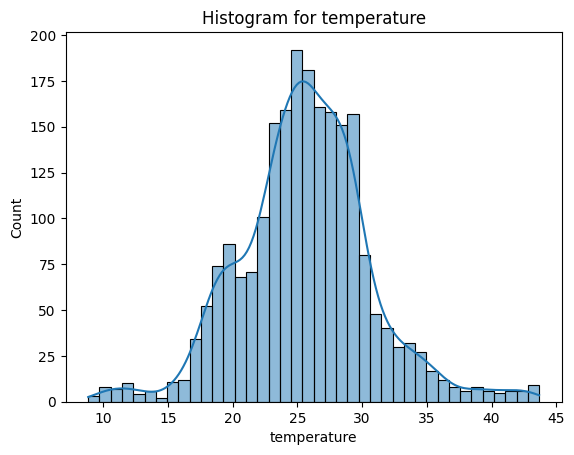

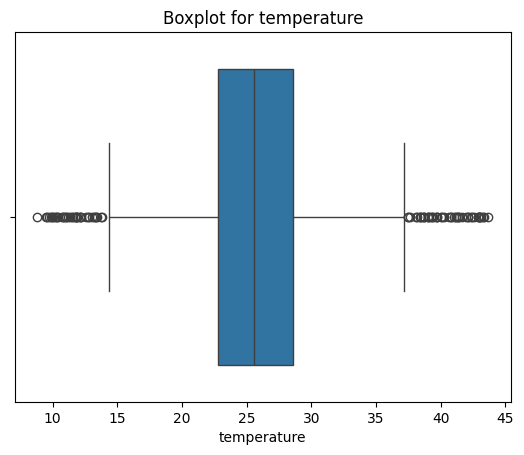

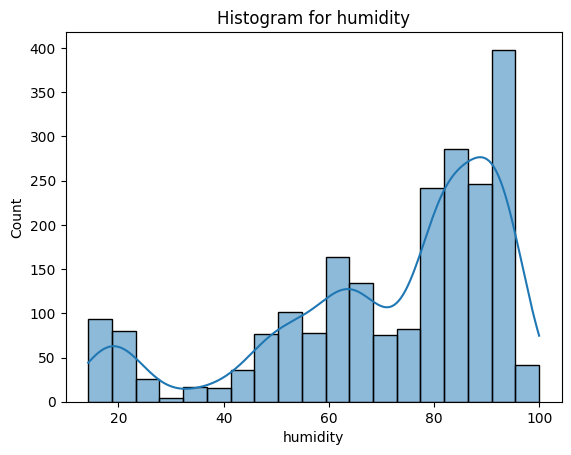

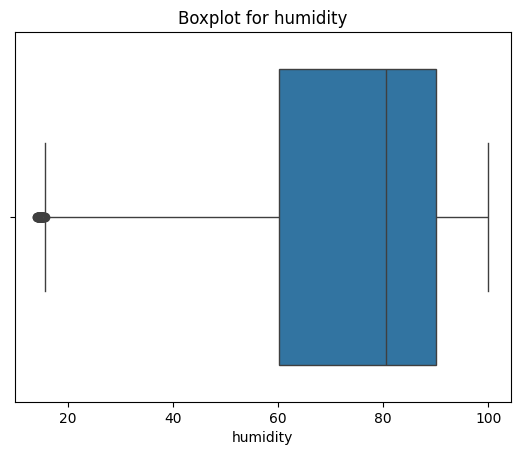

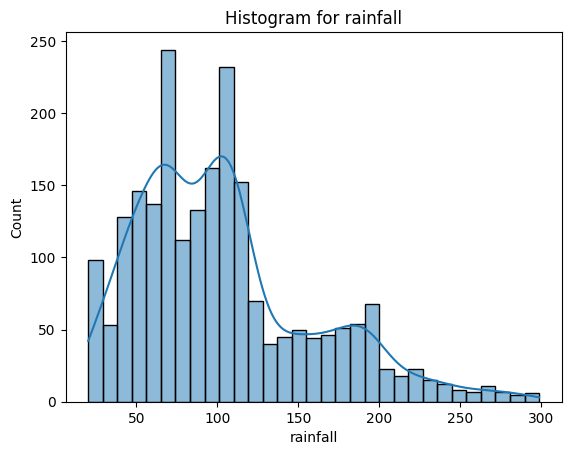

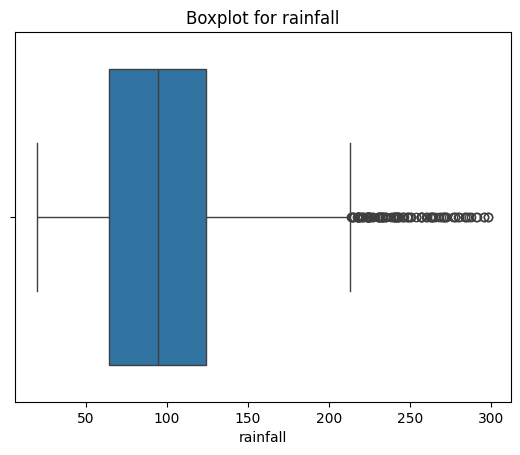

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Nitrogen
sns.histplot(dataframe['N'], kde=True)
plt.title("Histogram for Nitrogen")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['N'])
plt.title("Boxplot for Nitrogen")
plt.show()

# Distribution of Phosphorus
sns.histplot(dataframe['P'], kde=True)
plt.title("Histogram for Phosphorus")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['P'])
plt.title("Boxplot for Phosphorus")
plt.show()

# Distribution of Potassium
sns.histplot(dataframe['K'], kde=True)
plt.title("Histogram for Potassium")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['K'])
plt.title("Boxplot for Potassium")
plt.show()

# Distribution of pH
sns.histplot(dataframe['ph'], kde=True)
plt.title("Histogram for pH")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['ph'])
plt.title("Boxplot for pH")
plt.show()

# Distribution of temperature
sns.histplot(dataframe['temperature'], kde=True)
plt.title("Histogram for temperature")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['temperature'])
plt.title("Boxplot for temperature")
plt.show()

# Distribution of humidity
sns.histplot(dataframe['humidity'], kde=True)
plt.title("Histogram for humidity")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['humidity'])
plt.title("Boxplot for humidity")
plt.show()

# Distribution of rainfall
sns.histplot(dataframe['rainfall'], kde=True)
plt.title("Histogram for rainfall")
plt.show()

# Boxplot to check outliers
sns.boxplot(x=dataframe['rainfall'])
plt.title("Boxplot for rainfall")
plt.show()

##### Bar Plot for crop label

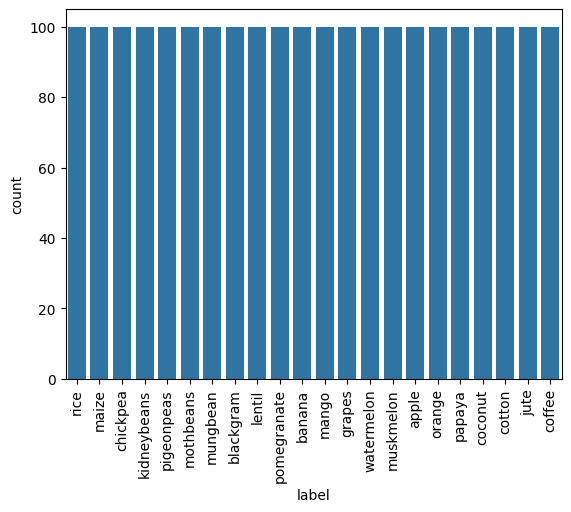

In [30]:
# Count plot for categorical variables
sns.countplot(x='label', data=dataframe)
plt.xticks(rotation=90)
plt.show()

#### (c) Correlation Analysis (Evaluate relationships between numerical features.)

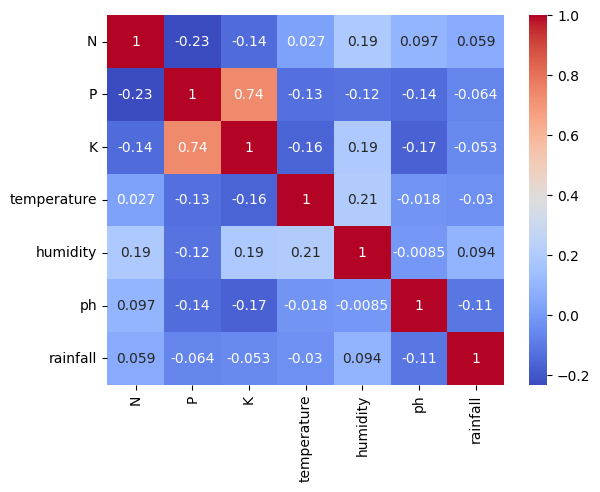

In [36]:
# Correlation matrix
data = dataframe.drop(columns=['label'])
correlation_matrix = data.corr()

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### (d) Pairwise Relationships (Use pair plots to visualize relationships between multiple numerical features.)

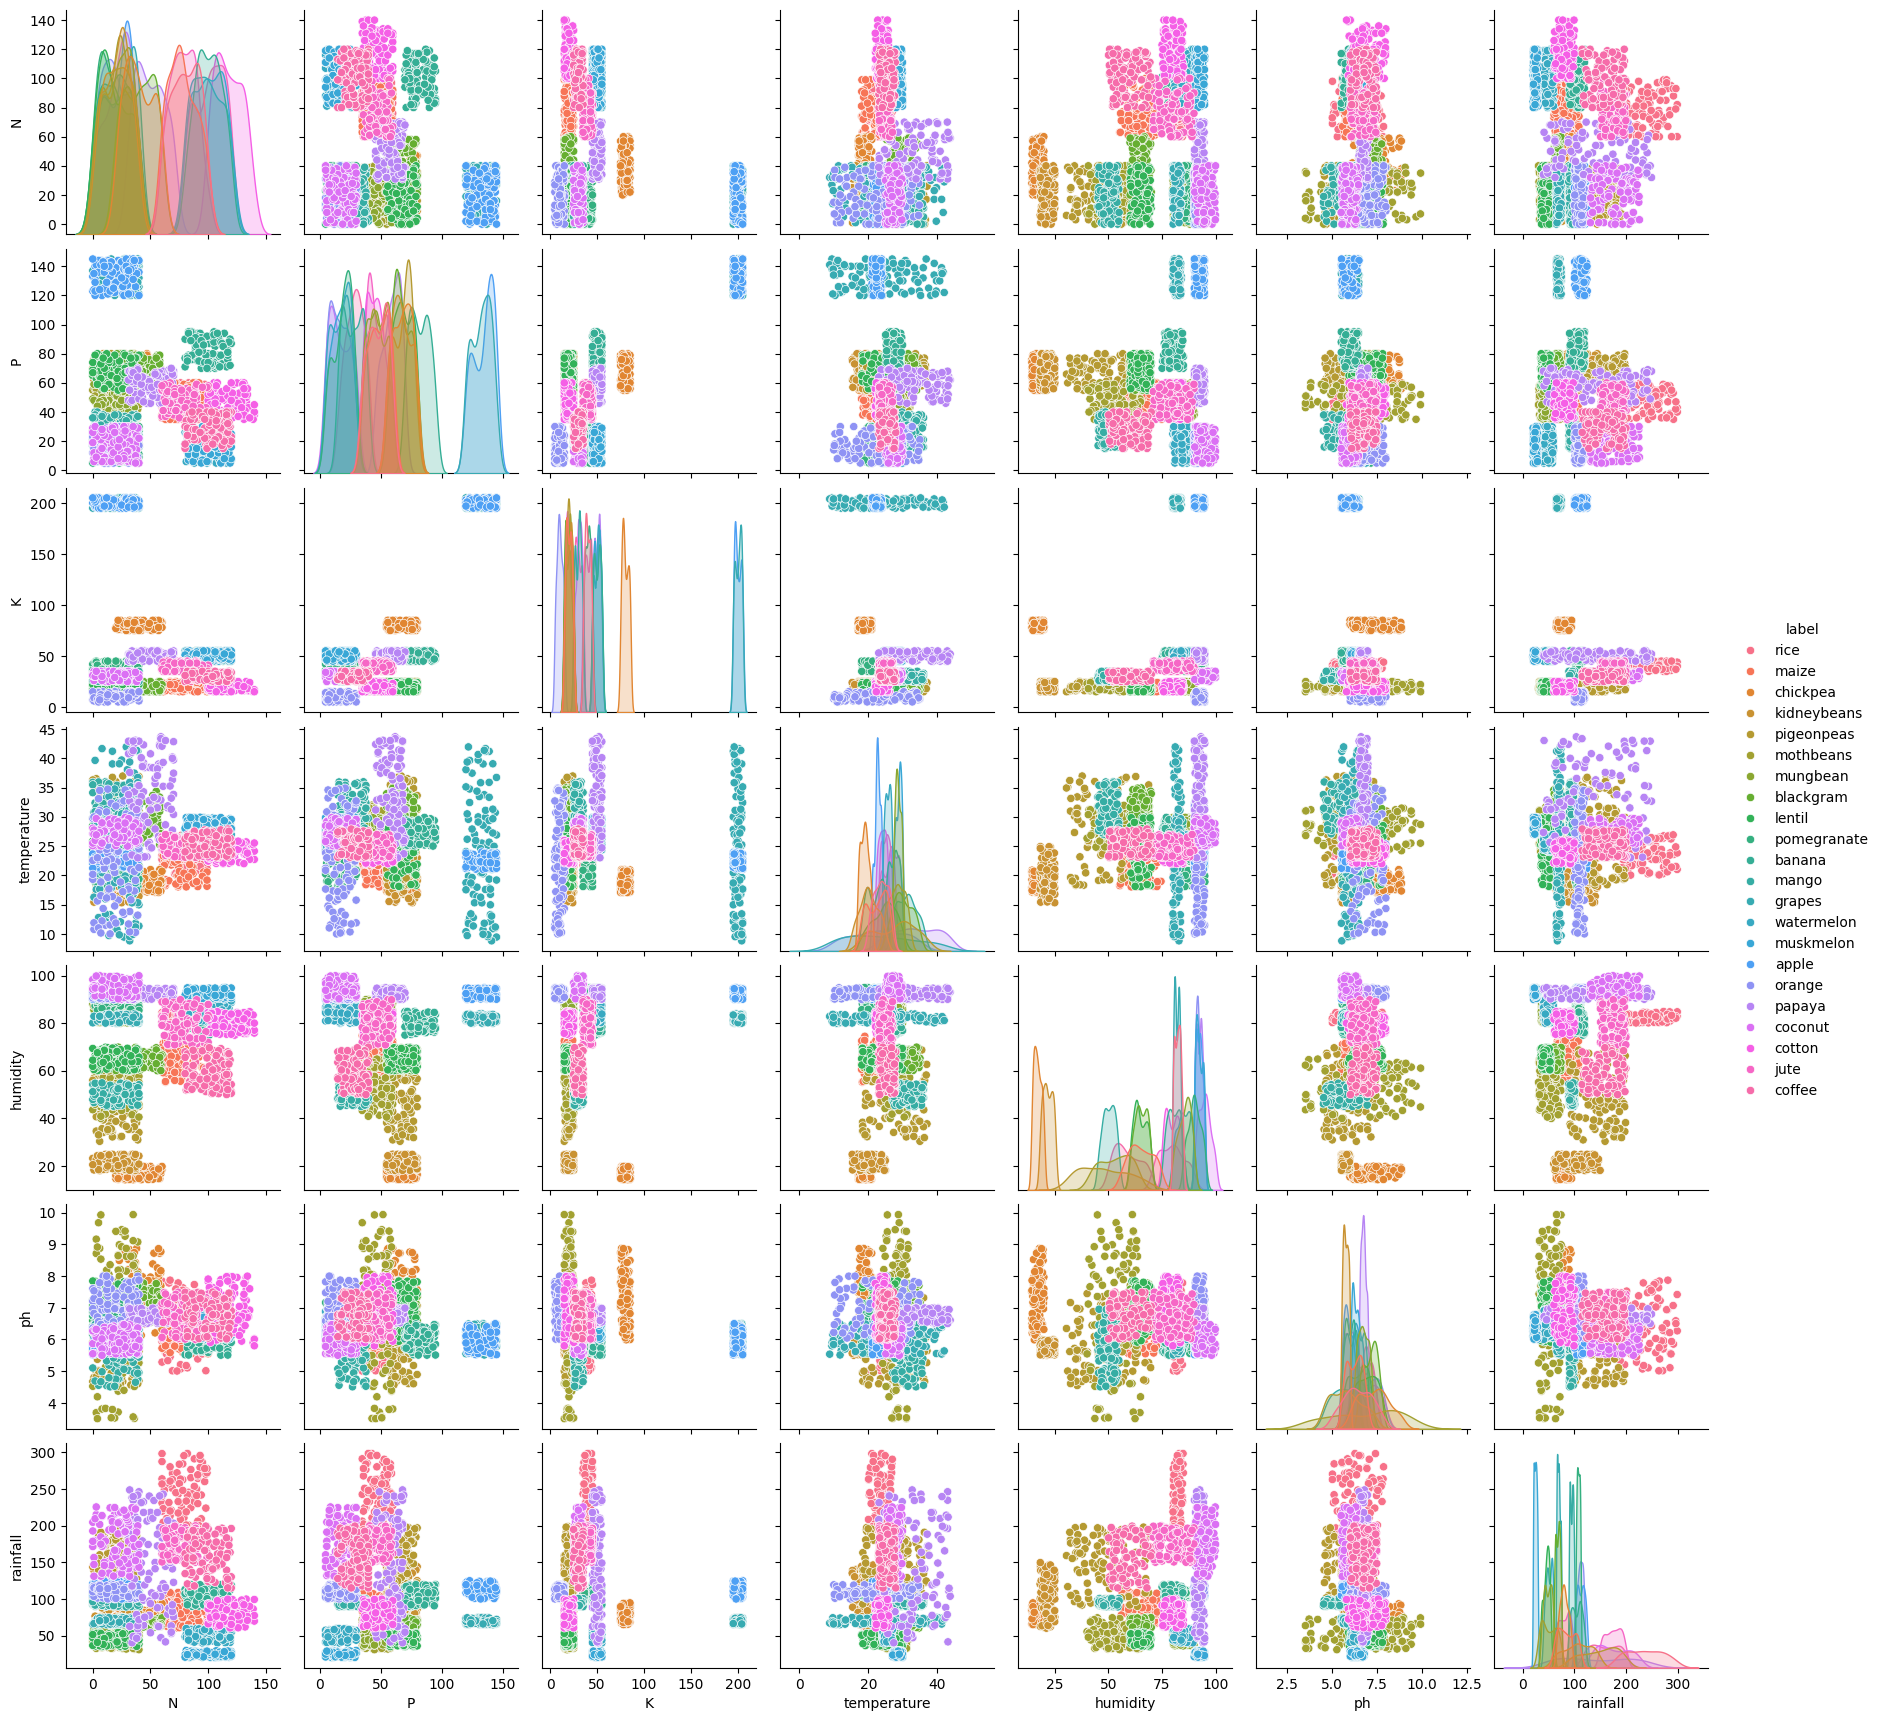

In [38]:
sns.pairplot(dataframe, hue='label')  # Use hue to differentiate classes
plt.show()

#### (e) Missing Value Handling (Handle missing values appropriately (imputation or removal).)


In [41]:
# Impute missing values (example with mean)
dataframe['N'].fillna(dataframe['N'].mean(), inplace=True)
dataframe['P'].fillna(dataframe['P'].mean(), inplace=True)
dataframe['K'].fillna(dataframe['K'].mean(), inplace=True)
dataframe['temperature'].fillna(dataframe['temperature'].mean(), inplace=True)
dataframe['humidity'].fillna(dataframe['humidity'].mean(), inplace=True)
dataframe['rainfall'].fillna(dataframe['rainfall'].mean(), inplace=True)

# Drop rows with missing values
#data.dropna(inplace=True)

C:\Users\kamal\AppData\Local\Temp\ipykernel_17628\2952934221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['N'].fillna(dataframe['N'].mean(), inplace=True)
C:\Users\kamal\AppData\Local\Temp\ipykernel_17628\2952934221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

#### (f) Feature Importance (Evaluate the importance of features for predicting the target variable.)

In [50]:
from sklearn.ensemble import RandomForestClassifier

X = dataframe.drop(columns=['label'])
y = dataframe['label']

model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

       Feature  Importance
4     humidity    0.222672
6     rainfall    0.221141
2            K    0.174276
1            P    0.146410
0            N    0.112206
3  temperature    0.068992
5           ph    0.054304


#### (g) Interaction Effects (Check if interactions between features are significant.)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(dataframe[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
print(interaction_features)

[[9.00000000e+01 4.20000000e+01 4.30000000e+01 ... 5.33262640e+02
  1.66412709e+04 1.31968681e+03]
 [8.50000000e+01 5.80000000e+01 4.10000000e+01 ... 5.65297395e+02
  1.82048921e+04 1.59522351e+03]
 [6.00000000e+01 5.50000000e+01 4.40000000e+01 ... 6.45411833e+02
  2.17297382e+04 2.06953438e+03]
 ...
 [1.18000000e+02 3.30000000e+01 3.00000000e+01 ... 4.27727097e+02
  1.16516492e+04 1.10278525e+03]
 [1.17000000e+02 3.20000000e+01 3.40000000e+01 ... 3.52318244e+02
  6.62931662e+03 8.59551422e+02]
 [1.04000000e+02 1.80000000e+01 3.00000000e+01 ... 4.09477989e+02
  8.51210047e+03 9.55529550e+02]]


#### (h) Dimensionality Reduction (Use PCA to visualize high-dimensional data.)

[0.27588831 0.18484431]
[1.93209643 1.29449859]


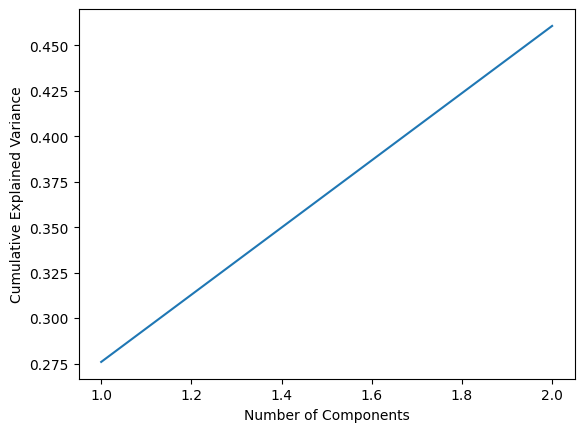

C:\Users\kamal\AppData\Local\Temp\ipykernel_17628\1936772140.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', s=50)


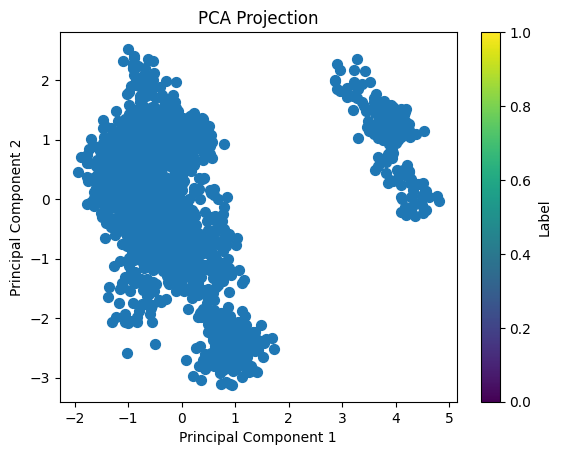

[[-0.30219096  0.64378667  0.62260719 -0.21242839 -0.06848339 -0.22694272
  -0.07253163]
 [ 0.33410693  0.03435809  0.2838292   0.35948683  0.73791663 -0.22065738
   0.290158  ]]
[0.27588831 0.18484431]
[[ 0.45831978 -0.34622523 -0.12318065 ...  0.66315065 -0.05408608
   0.28733974]
 [ 0.40566908 -0.27859615 -0.07273513 ...  0.61169133 -0.06547783
   0.26216947]
 [ 0.4236545  -0.38434231 -0.19764978 ...  0.55592282 -0.0093543
   0.24751126]
 ...
 [ 0.56404014 -0.72374638 -0.53943242 ...  0.55194714  0.12156118
   0.26985837]
 [ 0.35092374 -0.78669695 -0.77394495 ...  0.04483475  0.28824603
   0.07322833]
 [ 0.39626021 -0.88583921 -0.87068459 ...  0.05283918  0.32390974
   0.08339025]]


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = dataframe.drop(columns=['label'])
y = dataframe['label']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

# Choose number of components that explain sufficient variance (e.g., 95%)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar(label='Label')
plt.show()

# Principal components (directions in feature space)
print(pca.components_)

# Explained variance by each component
print(pca.explained_variance_ratio_)

# If needed, reconstruct the original data from the principal components.
X_reconstructed = pca.inverse_transform(X_pca)
print(X_reconstructed)

### 3. Data Cleaning and Data Splitting

In [ ]:
# Check missing values
dataframe.isna().sum()

In [ ]:
# Remove duplicates
dataframe.drop_duplicates()

In [69]:
# Data splitting (Stratified splitting)
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(dataframe, dataframe['label']):
    train_set = dataframe.iloc[train_indices]
    test_set = dataframe.iloc[test_indices]

### 5. Machine Learning Models

#### (a) Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
X = train_set.drop(columns=['label'])
y = train_set['label']

X_test = test_set.drop(columns=['label'])
y_test = test_set['label']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for decision tree on training data
  Default settings
Confusion Matrix
[[80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

#### (b) Random Forest Model

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X,y)
y_pred = rf_model.predict(X)

y_test_pred = rf_model.predict(X_test)
print('Results for RF on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

print('Results for RF on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for RF on train data
  Default settings
Confusion Matrix
[[80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 

#### (c) Support Vector Machine

In [72]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for svc on training data
  Default settings
Confusion Matrix
[[80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  3

#### (d) Neural Net Model

In [74]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


Results for NN on train data
  Default settings
Confusion Matrix
[[80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 78  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 79  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 77  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 

c:\MS\data_analytics\github\Capstone\Crop-Analysis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 6. Measurement of Performance Metrices

<table border="1">
<tr>
    <td>Model </td>
    <td>Dataset</td>
    <td>Accuracy</td>
    <td>Precision</td>
    <td>Recall</td>
    <td>F1-Score</td>
  </tr>
  <tr>
    <td rowspan="2">Decision Tree </td>
    <td>Training</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Testing</td>
    <td>99.31</td>
    <td>99.41</td>
    <td>99.32</td>
    <td>99.31</td>
  </tr>
   <tr>
    <td rowspan="2">Random Forest</td>
    <td>Training</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Testing</td>
    <td>99.31</td>
    <td>99.41</td>
    <td>99.32</td>
    <td>99.31</td>
  </tr>
  <tr>
    <td rowspan="2">Support Vector Machine </td>
    <td>Training</td>
    <td>97.67</td>
    <td>97.98</td>
    <td>97.67</td>
    <td>97.67</td>
  </tr>
  <tr>
    <td>Testing</td>
    <td>98.40</td>
    <td>98.68</td>
    <td>98.41</td>
    <td>98.39</td>
  </tr>
  <tr>
    <td rowspan="2">Neural Net </td>
    <td>Training</td>
    <td>99.20</td>
    <td>99.21</td>
    <td>99.20</td>
    <td>99.20</td>
  </tr>
  <tr>
    <td>Testing</td>
    <td>97.27</td>
    <td>97.32</td>
    <td>97.27</td>
    <td>97.27</td>
  </tr>
</table>


